In [84]:
############################################### Import Packages and Data set ###################################################

In [134]:
! pip install tensorflow

In [135]:
import tensorflow as tf

In [187]:
{
    "image_dim_ordering": "tf", 
    "epsilon": 1e-07, 
    "floatx": "float32", 
    "backend": "tensorflow"
}

{'backend': 'tensorflow',
 'epsilon': 1e-07,
 'floatx': 'float32',
 'image_dim_ordering': 'tf'}

In [188]:
from keras.datasets import mnist

In [189]:
import matplotlib.pyplot as plt

In [190]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [201]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [192]:
X_train.shape

(60000, 28, 28)

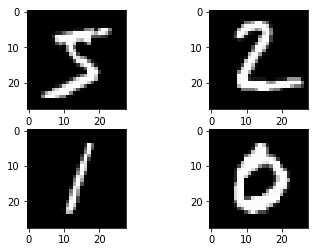

In [202]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_test[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_test[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_test[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [143]:
############################################### Import Packages and Data set ###################################################

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import time
from IPython import display
import matplotlib.gridspec as gridspec
%matplotlib inline

# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)
mnist = input_data.read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

X = tf.placeholder(tf.float32, [None, 28, 28, 1])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
init = tf.initialize_all_variables()



XX = tf.reshape(X, [-1, 784])

# model
Y = tf.nn.softmax(tf.matmul(XX, W) + b)
print(Y)

#Placeholder for correct answers
Y_ = tf.placeholder(tf.float32, [None, 10])

# Loss Function
cross_entropy = -tf.reduce_mean(Y_ * tf.log(Y)) * 1000.0
P = tf.argmax(Y,1)
A = tf.argmax(Y_,1)
# % 0f correct answers found in batch
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
train_step = optimizer.minimize(cross_entropy)

sess = tf.Session()
sess.run(init)

py_a = []
py_c = []

#==============================================Show sample Train Data===========================================================#
Train_X, Train_Y = mnist.train.next_batch(100)

print(len(Train_X))

print(Train_X.shape)

Train_Y[1]  #=============== first row of 28X28 matrix

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz
Tensor("Softmax_67:0", shape=(?, 10), dtype=float32)
100
(100, 28, 28, 1)


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

0.68
180.9186
[0.0977934  0.10258631 0.04534107 0.10476355 0.1348052  0.07635181
 0.08149078 0.09390129 0.1172304  0.14573613]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
(100, 10)
(100, 10)
9
4
28
(28, 28, 1)


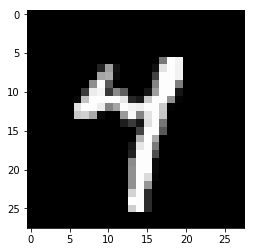

In [277]:

#============================================Run Model and plot accuracy========================================================#
#===============================================================================================================================#
for  i in range(1):
    # Load batch of images and correct answers
    batch_X, batch_Y = mnist.train.next_batch(100)
    # train
    sess.run(train_step, feed_dict = {X: batch_X, Y_: batch_Y})
    Z_Y = sess.run(Y, feed_dict = {X: batch_X, Y_: batch_Y})
    Z_P_max = sess.run(P, feed_dict = {X: batch_X, Y_: batch_Y})
    Z_A_max = sess.run(A, feed_dict = {X: batch_X, Y_: batch_Y})
    
    #success ? add code to print it
    tr_a,tr_c, tr_co = sess.run([accuracy, cross_entropy, is_correct], feed_dict = {X: batch_X, Y_: batch_Y})
    py_a.append(tr_a)
    py_c.append(tr_c)
    #print(py_a)
    #print(py_c)
    
    py_a1 = np.asarray(py_a)
    py_c1 = np.asarray(py_c)
    
    #print(py_a1)
    py_a_index = range(0,i+1,1)
    py_a_col = ['Accuracy']
    df_a = pd.DataFrame(py_a1, index = py_a_index, columns = py_a_col)
    
    #print(i)
    #print(py_a1)
    #print(df_a)
    #df_c = pd.DataFrame(py_c1.reshape(-1, len(py_c1)),columns=list('Cross_Entropy'))
    
    #plt.plot(df_a)
    #plt.show()
    
    
    #f = plt.figure(1)
    ##
    #plt.plot(py_a1)
    #display.display(plt.gcf())
    #plt.xlabel('Batch Image')
    #plt.ylabel('Accuracy')
    #plt.title('Change in Accuracy')
    #display.clear_output(wait=True)
    print(tr_a)
    print(tr_c)
    #print(tr_co)  
    print(Z_Y[0])
    print(batch_Y[0])
    print(Z_Y.shape)
    print(batch_Y.shape)
    print(Z_P_max[0])
    print(Z_A_max[0])
    print(len(batch_X[0]))
    print(batch_X[0].shape)
        
    plt.imshow(batch_X[0].reshape(28,28), cmap=plt.get_cmap('gray'))
    plt.show()

   
    #success on test data ?
    test_data = {X:mnist.test.images, Y_:mnist.test.labels}
    te_a,te_c, tr_co = sess.run([accuracy, cross_entropy, is_correct], feed_dict = {X:mnist.test.images, Y_:mnist.test.labels})
    

    

In [118]:
py_a1

array([0.68, 0.52, 0.83, 0.76, 0.85, 0.83, 0.83, 0.81, 0.85, 0.86, 0.79,
       0.79, 0.85, 0.83, 0.82, 0.9 , 0.9 , 0.87, 0.87, 0.89, 0.91, 0.86,
       0.93, 0.9 , 0.86, 0.87, 0.82, 0.91, 0.91, 0.85, 0.89, 0.87, 0.91,
       0.87, 0.87, 0.89, 0.9 , 0.87, 0.91, 0.86, 0.89, 0.89, 0.92, 0.82,
       0.92, 0.88, 0.93, 0.9 , 0.89, 0.86, 0.86, 0.93, 0.87, 0.89, 0.9 ,
       0.9 , 0.88, 0.92, 0.91, 0.92, 0.91, 0.93, 0.91, 0.89, 0.88, 0.88,
       0.94, 0.86, 0.88, 0.91, 0.9 , 0.86, 0.89, 0.91, 0.89, 0.92, 0.94,
       0.92, 0.9 , 0.9 , 0.87, 0.89, 0.91, 0.91, 0.9 , 0.92, 0.9 , 0.92,
       0.89, 0.9 , 0.86, 0.91, 0.92, 0.88, 0.84, 0.94, 0.89, 0.9 , 0.85,
       0.97, 0.87], dtype=float32)

In [160]:
is_correct

<tf.Tensor 'Equal_10:0' shape=(?,) dtype=bool>

In [120]:
print(sess.run(train_step, feed_dict = {X: batch_X, Y_: batch_Y}))

None
